<a href="https://colab.research.google.com/github/221sakshisharma/coursera-ML-work/blob/main/MultiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression #for one vs all classifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

#Loading the Obesity Risk Prediction Dataset

In [ ]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#Exploratory Data Analysis

A countplot counts how many times each category appears in the data and plots it as a bar chart.

Text(0.5, 1.0, 'Distribution of Obesity Levels')

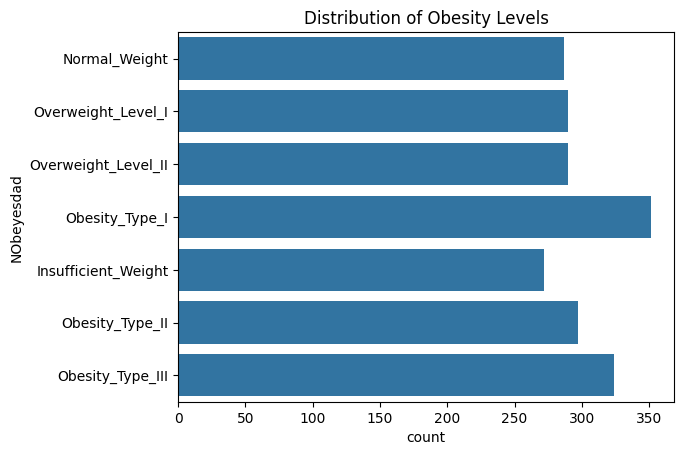

In [ ]:
sns.countplot(y='NObeyesdad', data=df)
plt.title('Distribution of Obesity Levels')

This shows that the dataset is fairly balanced and does not require any special attention to avoid biased training.

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

#Preprocessing the Data


##Standardization

In [ ]:
continuous_cols = df.select_dtypes(include='float').columns.tolist()

In [ ]:
std_scaler = StandardScaler()

In [ ]:
scaled_df = std_scaler.fit_transform(df[continuous_cols])

In [ ]:
scaled_df = pd.DataFrame(scaled_df, columns=std_scaler.get_feature_names_out(continuous_cols))
# scaled_df = pd.DataFrame(scaled_df, columns=continous_cols)

In [ ]:
scaled_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


##One Hot Encoding

One-hot encoding is a technique used to convert categorical data into a binary format where each category is represented by a separate column with a 1 indicating its presence and 0s for all other categories

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_cols.remove('NObeyesdad')

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

NameError: name 'OneHotEncoder' is not defined

In [ ]:
encoded_df = encoder.fit_transform(df[categorical_cols])

In [ ]:
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
encoded_df.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
prepped_data = pd.concat([scaled_df, encoded_df], axis=1)

Adding the target column

In [ ]:
category_mapping = dict(enumerate(df['NObeyesdad'].astype('category').cat.categories))
category_mapping

{0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Obesity_Type_I',
 3: 'Obesity_Type_II',
 4: 'Obesity_Type_III',
 5: 'Overweight_Level_I',
 6: 'Overweight_Level_II'}

In [ ]:
prepped_data['NObeyesdad'] = df['NObeyesdad'].astype('category').cat.codes

In [ ]:
prepped_data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6


##Seperating Input and Target Data

In [ ]:
X = prepped_data.drop('NObeyesdad', axis=1)

In [ ]:
y = prepped_data['NObeyesdad']

##Splitting Data into Training and Test Sets

 Using stratify, the split will keep the same proportion of each class (label) in both the training and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Model Training And Evaluation

##OnevsAll

In the One-vs-All approach:

* The algorithm trains a single binary classifier for each class.
* Each classifier learns to distinguish a single class from all the others combined.
* If there are k classes, k classifiers are trained.
* During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.

In [ ]:
model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)

In [ ]:
model_ovr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
y_pred_ovr = model_ovr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_ovr)

0.7612293144208038

##OneVsOne

In the One-vs-One approach:
* The algorithm trains a binary classifier for every pair of classes in the dataset.
* If there are k classes, this results in $k(k-1)/2$ classifiers.
* Each classifier is trained to distinguish between two specific classes, ignoring the rest.
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.

In [ ]:
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))

In [ ]:
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
y_pred_ovo = model_ovo.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_ovo)

0.9219858156028369

##Visualizing Feature Importance

For each class, it tells what the model has learned about each feature

In [ ]:
class_names = df['NObeyesdad'].unique()

In [ ]:
coef_df_ovr = pd.DataFrame(model_ovr.coef_, columns=X.columns, index=class_names)

In [ ]:
coef_df_ovr

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Normal_Weight,-0.532857,2.132421,-8.163667,0.322106,0.106604,0.207379,-0.082784,0.131655,-0.513389,-0.168412,...,0.348022,-0.747752,-0.269460,-0.418175,0.221184,0.198028,-0.746571,-0.230399,0.115351,-0.507643
Overweight_Level_I,-0.197206,-0.068134,-1.568923,-0.166286,-0.004759,-0.257154,0.232062,-0.176496,0.940909,-0.193081,...,-1.489819,1.040492,0.160823,0.599543,-0.571662,-0.498339,1.089924,1.064175,-0.304339,1.422402
Overweight_Level_II,-0.181982,-0.763412,0.855632,-0.798273,-0.346390,0.306530,0.180998,-0.000351,0.214902,1.701697,...,-0.831563,0.515194,-1.304518,0.450492,-0.760068,0.423571,-0.434851,0.657258,-0.894124,-0.828750
Obesity_Type_I,1.020165,-1.260102,5.078179,-0.041486,-0.113528,-0.654409,-0.292465,-0.214560,7.897763,0.331263,...,-0.061529,-0.129386,-0.077929,-0.897491,0.542162,0.337922,0.002403,-0.169694,0.971866,-0.140121
Insufficient_Weight,-0.368808,-1.855347,4.145547,2.101469,1.233540,0.250151,-1.168297,-0.268125,-3.076738,0.441420,...,-0.001465,-0.184938,-0.277657,-0.056447,0.754010,-0.787079,0.000722,-0.012386,1.162279,0.005007
Obesity_Type_II,0.039690,0.346200,-1.134781,-0.196304,-0.231220,0.165575,-0.001746,-0.226059,-0.181026,0.426493,...,1.919955,-0.651856,1.532200,0.493479,0.331087,-0.843731,0.045995,-0.554954,-0.009174,-0.126503
Obesity_Type_III,0.706852,0.364232,-0.913616,-0.165926,-0.319058,0.099433,-0.296648,0.195392,0.774562,1.709863,...,-0.200777,-1.281668,-0.960827,0.364016,-0.316974,0.034554,-1.007159,-0.051938,0.557427,-0.215419


<Axes: >

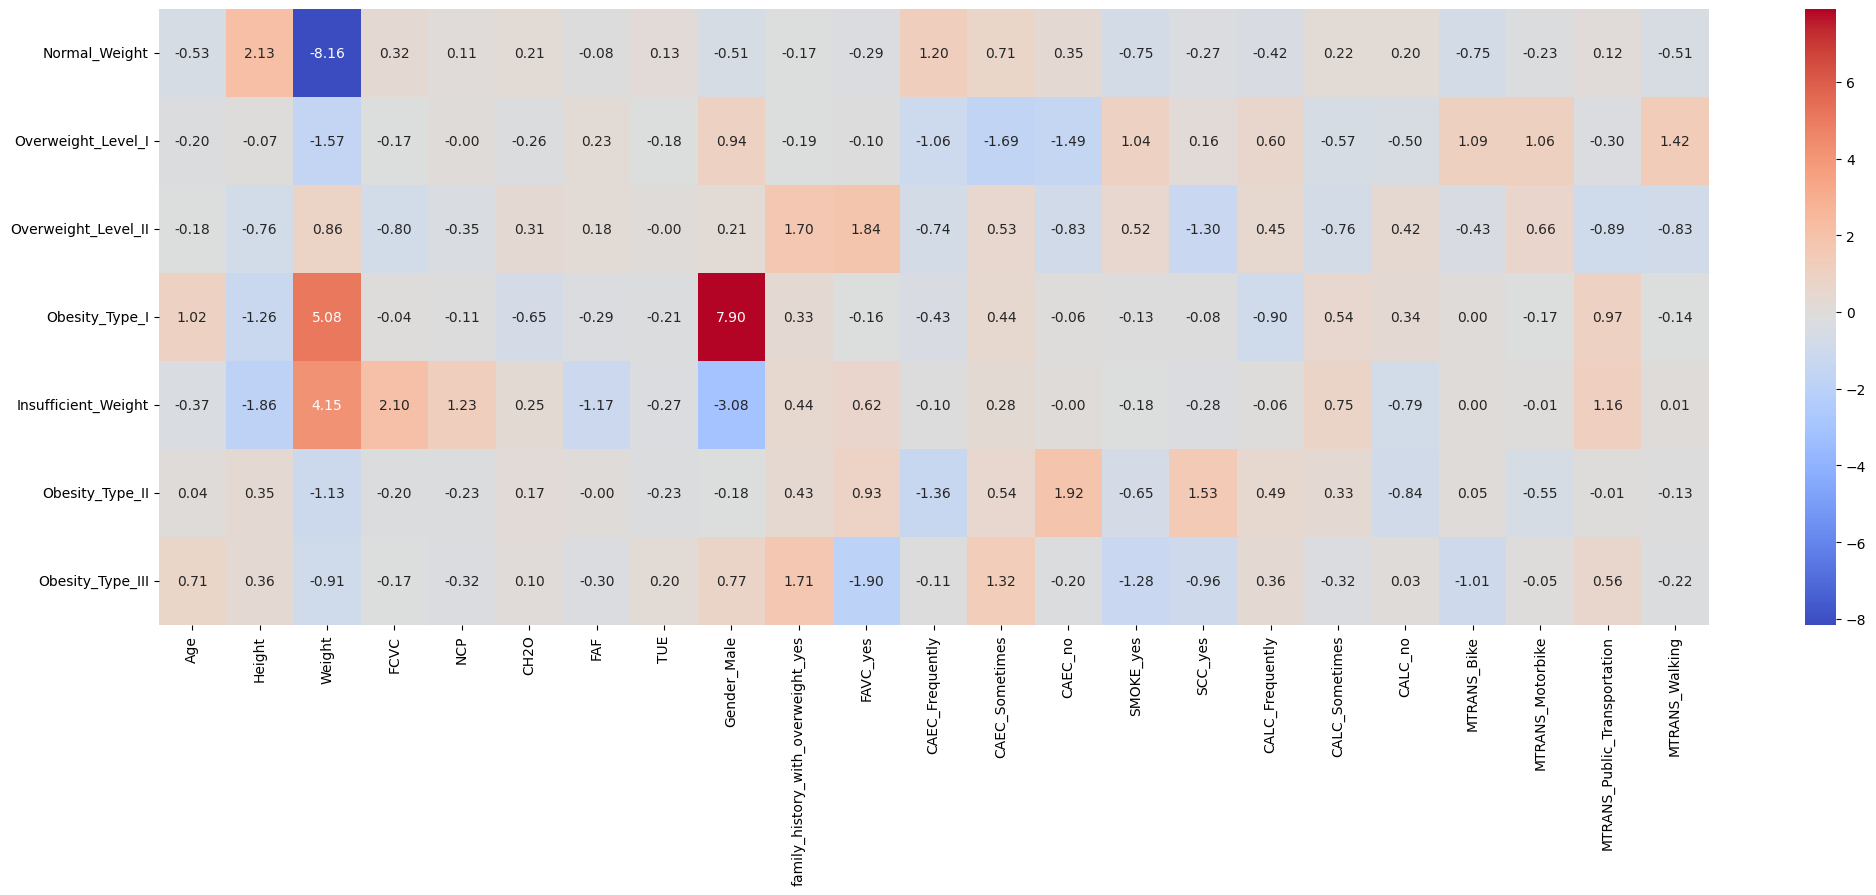

In [ ]:
plt.figure(figsize=(25, 8))
sns.heatmap(coef_df_ovr, annot=True, cmap='coolwarm', fmt='.2f')

In [ ]:
from itertools import combinations

In [ ]:
class_pairs = list(combinations(model_ovo.classes_, 2))

In [ ]:
coef_df = pd.DataFrame(columns=X.columns)

In [ ]:
for i, estimator in enumerate(model_ovo.estimators_):
    # Get the classes for this specific estimator
    class_index_i, class_index_j = class_pairs[i]

    # Get the actual class names
    class_name_i = category_mapping[class_index_i]
    class_name_j = category_mapping[class_index_j]

    coefs = estimator.coef_.flatten()

    coef_df.loc[i] = coefs
    coef_df = coef_df.rename(index={i: f'{class_name_i} vs {class_name_j}'})

In [ ]:
coef_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Insufficient_Weight vs Normal_Weight,0.526959,-2.103461,7.996579,-0.323126,-0.101077,-0.212635,0.086533,-0.135733,0.548032,0.150992,...,-0.339310,0.767373,0.225980,0.428862,-0.234850,-0.194683,0.747849,0.228598,-0.129593,0.538004
Insufficient_Weight vs Obesity_Type_I,0.745066,-0.791418,4.539351,-0.247267,-0.500771,-0.172457,-0.067943,-0.192750,-0.269039,0.967801,...,-0.050482,0.136638,-0.112791,0.109689,-0.233973,0.128424,0.000000,0.016017,0.191889,0.095770
Insufficient_Weight vs Obesity_Type_II,1.181450,-0.072931,3.337867,-0.015532,-0.456623,-0.418857,-0.092313,-0.218023,0.498972,0.328448,...,-0.012880,0.013056,-0.067158,-0.003879,0.017385,-0.013326,0.000000,0.000000,0.258509,-0.021788
Insufficient_Weight vs Obesity_Type_III,0.737281,-0.409251,2.997908,0.683935,0.145937,0.085308,-0.709930,-0.095192,-0.467018,0.550733,...,-0.017065,0.001474,-0.101844,-0.000795,0.441955,-0.444127,0.000000,0.000000,0.230992,-0.010454
Insufficient_Weight vs Overweight_Level_I,0.922844,-1.409793,6.019331,-0.303271,-0.396566,0.129222,-0.173020,-0.186334,-0.019990,0.768997,...,0.290968,-0.017918,0.816925,0.292704,0.242537,-0.508146,0.055126,0.000000,0.091581,0.402838
Insufficient_Weight vs Overweight_Level_II,1.121510,-1.127578,5.065137,-0.184288,-0.436063,0.050431,0.015860,-0.046319,0.283449,1.087181,...,-0.041340,0.137968,-0.017482,0.263872,0.013120,-0.248272,0.000000,0.056449,0.290277,0.006724
Normal_Weight vs Obesity_Type_I,0.361071,-1.345135,5.939873,-0.185615,-0.010451,0.071493,-0.137318,0.001404,-0.671551,1.126961,...,-0.096099,0.262027,-0.387251,-0.143021,-0.134932,0.270743,-0.107763,-0.092149,0.031516,-0.534038
Normal_Weight vs Obesity_Type_II,0.545178,-0.409150,4.359146,0.099570,0.049290,-0.381903,-0.201700,-0.117403,0.323552,0.594418,...,-0.044328,-0.171825,-0.201497,-0.354366,-0.019182,0.366292,-0.054886,-0.050450,0.331954,-0.252547
Normal_Weight vs Obesity_Type_III,0.285282,-0.564147,3.450512,0.785365,0.345303,0.089954,-0.745241,-0.014862,-0.845179,0.665970,...,-0.011282,-0.058718,-0.153611,-0.213177,0.533984,-0.358700,-0.010724,-0.085317,0.598659,-0.205398
Normal_Weight vs Overweight_Level_I,0.299591,-1.854335,7.661609,-0.214739,-0.054086,0.236071,-0.244681,0.021644,-0.493638,0.606087,...,1.231488,-0.737308,0.939944,-0.157528,0.512515,-0.329011,-0.115331,-0.726601,0.267603,-0.689250
